# MNIST CLassifier

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [47]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


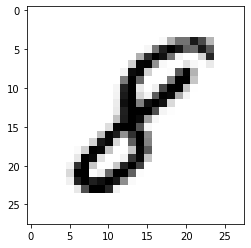

In [48]:

import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [49]:

x_train.shape

(60000, 28, 28)

In [52]:
y_train.shape

(60000,)

In [ ]:
print(x_train)

In [4]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2092 - accuracy: 0.9381
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0857 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.98 - 24s 13ms/step - loss: 0.0593 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0461 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0255 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0215 - accuracy: 0.9926
Epoch 10/10
1875/1875 

In [9]:

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0556 - accuracy: 0.9867


[0.05563493072986603, 0.9866999983787537]

9


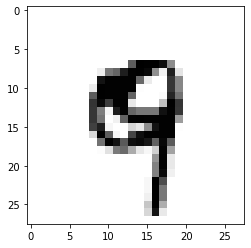

In [8]:

image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [34]:
x_train_bin = x_train
x_test_bin = x_test

y_train_bin = []
for i in y_train:
    if i==9:
        y_train_bin.append(1)
    else:
        y_train_bin.append(0)

y_test_bin=[]
for i in y_test:
    if i==9:
        y_test_bin.append(1)
    else:
        y_test_bin.append(0)
        
y_train_bin = np.array(y_train_bin)
y_train_bin.astype(np.uint8)
y_test_bin = np.array(y_test_bin)
y_test_bin.astype(np.uint8)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [35]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [36]:

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_bin,y=y_train_bin, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0684 - accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0154 - accuracy: 0.9955
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0052 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0043 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [46]:
model.evaluate(x_test_bin, y_test_bin)

313/313 [==============================] - 1s 5ms/step - loss: 0.0231 - accuracy: 0.9946


[0.023125246167182922, 0.9945999979972839]